## Import libraries

In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#Visualization
from visualize import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#To convert Y to one-hot-vector notation
from keras.utils import np_utils

#Used for CNN Model
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

#Create training and testing data
from sklearn.model_selection import train_test_split

## Unpacking .pkl files

In [2]:
with open('train_image.pkl', 'rb') as f:
    X = pickle.load(f)

X = np.array(X)

In [3]:
print(type(X))
print(len(X))

<class 'numpy.ndarray'>
8000


In [4]:
#print(X[0])

In [70]:
with open('train_label.pkl', 'rb') as f:
    Y = pickle.load(f)

Y = np.array(Y)

In [71]:
print(len(Y))
print(np.unique(Y, return_counts=True))

8000
(array([0, 2, 3, 6]), array([2000, 2000, 2000, 2000], dtype=int64))


#### Since the labels are 0,2,3 and 6, we have to convert them to 0,1,2,3 so that they can be converted into one hot vectors to perform CNN

In [72]:
Y = np.ceil(np.divide(Y,2))
classes = np.unique(Y)
print(np.unique(Y, return_counts=True))

(array([0., 1., 2., 3.]), array([2000, 2000, 2000, 2000], dtype=int64))


In [8]:
#print(Y)

In [9]:
with open('test_image.pkl', 'rb') as f:
    XTest = pickle.load(f)

XTest = np.array(XTest)

In [10]:
print(len(XTest))

2000


In [11]:
print(X.shape, Y.shape)

(8000, 784) (8000,)


In [12]:
# Since CNN accepts input in the form of images therefore we reshape our training data
X = X.reshape((-1,28,28,1))
Y = np_utils.to_categorical(Y)

print(X.shape, Y.shape)

(8000, 28, 28, 1) (8000, 4)


## Visualizing training data

In [13]:
def drawImage(img):
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

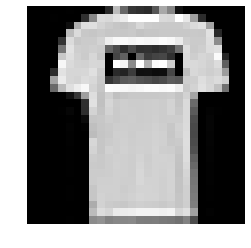

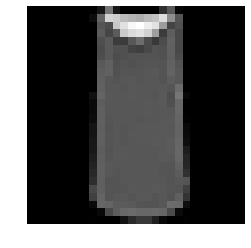

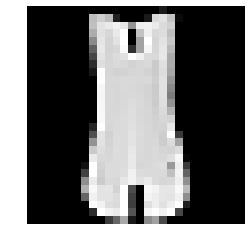

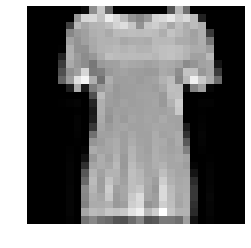

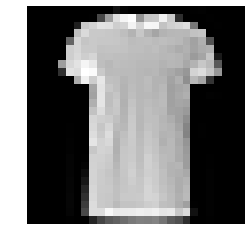

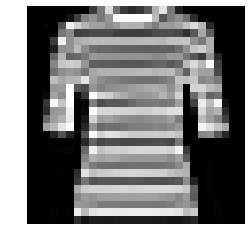

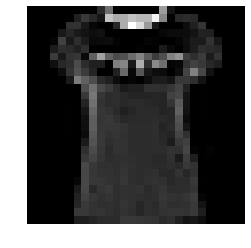

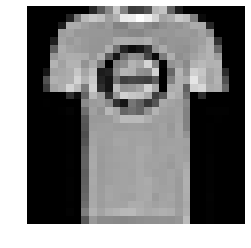

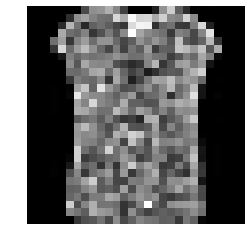

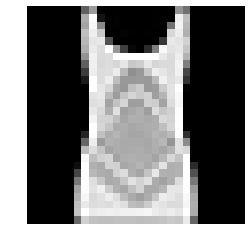

In [14]:
for i in range(10):
    drawImage(np.array(X[i]))

## Creating training and validation data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, shuffle=True, stratify=Y)

In [32]:
print(type(X_train))
print(len(X_train))

<class 'numpy.ndarray'>
6800


In [34]:
#print(np.unique(X_train))

## Building a CNN Model

In [39]:
#A simple CNN model with basic layers
model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #Input size is provided only in the first layer
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 51204     
Total para

In [40]:
## Optimizer
adam = optimizers.adam(lr=1e-4)

In [41]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [38]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/100
6800/6800 [==============================] - 42s 6ms/step - loss: 4.9290 - acc: 0.5078 - val_loss: 1.7624 - val_acc: 0.6600
Epoch 2/100
6800/6800 [==============================] - 39s 6ms/step - loss: 1.8278 - acc: 0.6835 - val_loss: 1.1382 - val_acc: 0.7300
Epoch 3/100
6800/6800 [==============================] - 39s 6ms/step - loss: 1.2891 - acc: 0.7194 - val_loss: 0.8842 - val_acc: 0.7483
Epoch 4/100
6800/6800 [==============================] - 39s 6ms/step - loss: 1.0765 - acc: 0.7379 - val_loss: 0.7534 - val_acc: 0.7667
Epoch 5/100
6800/6800 [==============================] - 39s 6ms/step - loss: 0.9337 - acc: 0.7579 - val_loss: 0.7462 - val_acc: 0.7633
Epoch 6/100
6800/6800 [==============================] - 38s 6ms/step - loss: 0.8430 - acc: 0.7666 - val_loss: 0.6651 - val_acc: 0.7800
Epoch 7/100
6800/6800 [==============================] - 37s 5ms/step - loss: 0.8479 - acc: 0.7681 - val_loss: 0.6216 - val_acc: 0.8033


6800/6800 [==============================] - 29s 4ms/step - loss: 0.1079 - acc: 0.9603 - val_loss: 0.4359 - val_acc: 0.8467
Epoch 61/100
6800/6800 [==============================] - 29s 4ms/step - loss: 0.1004 - acc: 0.9651 - val_loss: 0.4290 - val_acc: 0.8517
Epoch 62/100
6800/6800 [==============================] - 28s 4ms/step - loss: 0.1080 - acc: 0.9597 - val_loss: 0.4611 - val_acc: 0.8525
Epoch 63/100
6800/6800 [==============================] - 33s 5ms/step - loss: 0.1009 - acc: 0.9650 - val_loss: 0.4526 - val_acc: 0.8517
Epoch 64/100
6800/6800 [==============================] - 32s 5ms/step - loss: 0.1062 - acc: 0.9591 - val_loss: 0.4379 - val_acc: 0.8608
Epoch 65/100
6800/6800 [==============================] - 32s 5ms/step - loss: 0.1115 - acc: 0.9571 - val_loss: 0.4405 - val_acc: 0.8550
Epoch 66/100
6800/6800 [==============================] - 31s 4ms/step - loss: 0.0985 - acc: 0.9637 - val_loss: 0.4299 - val_acc: 0.8583
Epoch 67/100
6800/6800 [==============================

We see that the accuracy is still increasing after 100 epochs so we increase the number of epochs

In [42]:
hist = model.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 30s 4ms/step - loss: 2.4603 - acc: 0.5646 - val_loss: 1.0657 - val_acc: 0.7142
Epoch 2/200
6800/6800 [==============================] - 29s 4ms/step - loss: 1.1696 - acc: 0.7169 - val_loss: 0.7738 - val_acc: 0.7700
Epoch 3/200
6800/6800 [==============================] - 31s 5ms/step - loss: 0.9896 - acc: 0.7391 - val_loss: 0.6715 - val_acc: 0.7800
Epoch 4/200
6800/6800 [==============================] - 32s 5ms/step - loss: 0.8085 - acc: 0.7665 - val_loss: 0.6762 - val_acc: 0.7750
Epoch 5/200
6800/6800 [==============================] - 31s 4ms/step - loss: 0.7660 - acc: 0.7729 - val_loss: 0.6602 - val_acc: 0.7833
Epoch 6/200
6800/6800 [==============================] - 30s 4ms/step - loss: 0.6839 - acc: 0.7850 - val_loss: 0.5549 - val_acc: 0.8075
Epoch 7/200
6800/6800 [==============================] - 30s 4ms/step - loss: 0.6109 - acc: 0.8038 - val_loss: 0.5374 - val_acc: 0.8142


6800/6800 [==============================] - 29s 4ms/step - loss: 0.0748 - acc: 0.9749 - val_loss: 0.4288 - val_acc: 0.8742
Epoch 61/200
6800/6800 [==============================] - 29s 4ms/step - loss: 0.0793 - acc: 0.9713 - val_loss: 0.4628 - val_acc: 0.8633
Epoch 62/200
6800/6800 [==============================] - 29s 4ms/step - loss: 0.0789 - acc: 0.9703 - val_loss: 0.4427 - val_acc: 0.8642
Epoch 63/200
6800/6800 [==============================] - 32s 5ms/step - loss: 0.0686 - acc: 0.9772 - val_loss: 0.4392 - val_acc: 0.8667
Epoch 64/200
6800/6800 [==============================] - 33s 5ms/step - loss: 0.0660 - acc: 0.9784 - val_loss: 0.4499 - val_acc: 0.8633
Epoch 65/200
6800/6800 [==============================] - 31s 4ms/step - loss: 0.0681 - acc: 0.9766 - val_loss: 0.4661 - val_acc: 0.8633
Epoch 66/200
6800/6800 [==============================] - 31s 4ms/step - loss: 0.0689 - acc: 0.9765 - val_loss: 0.4337 - val_acc: 0.8742
Epoch 67/200
6800/6800 [==============================

Epoch 120/200
6800/6800 [==============================] - 35s 5ms/step - loss: 0.0208 - acc: 0.9953 - val_loss: 0.5256 - val_acc: 0.8725
Epoch 121/200
6800/6800 [==============================] - 34s 5ms/step - loss: 0.0180 - acc: 0.9956 - val_loss: 0.5011 - val_acc: 0.8775
Epoch 122/200
6800/6800 [==============================] - 40s 6ms/step - loss: 0.0167 - acc: 0.9962 - val_loss: 0.5073 - val_acc: 0.8725
Epoch 123/200
6800/6800 [==============================] - 34s 5ms/step - loss: 0.0178 - acc: 0.9956 - val_loss: 0.5158 - val_acc: 0.8725
Epoch 124/200
6800/6800 [==============================] - 37s 5ms/step - loss: 0.0193 - acc: 0.9956 - val_loss: 0.5096 - val_acc: 0.8767
Epoch 125/200
6800/6800 [==============================] - 33s 5ms/step - loss: 0.0174 - acc: 0.9956 - val_loss: 0.5334 - val_acc: 0.8700
Epoch 126/200
6800/6800 [==============================] - 30s 4ms/step - loss: 0.0206 - acc: 0.9944 - val_loss: 0.5087 - val_acc: 0.8783
Epoch 127/200
6800/6800 [=========

6800/6800 [==============================] - 33s 5ms/step - loss: 0.0094 - acc: 0.9981 - val_loss: 0.5858 - val_acc: 0.8725
Epoch 180/200
6800/6800 [==============================] - 31s 5ms/step - loss: 0.0087 - acc: 0.9985 - val_loss: 0.5746 - val_acc: 0.8742
Epoch 181/200
6800/6800 [==============================] - 35s 5ms/step - loss: 0.0062 - acc: 0.9988 - val_loss: 0.5782 - val_acc: 0.8767
Epoch 182/200
6800/6800 [==============================] - 31s 5ms/step - loss: 0.0067 - acc: 0.9985 - val_loss: 0.6039 - val_acc: 0.8733
Epoch 183/200
6800/6800 [==============================] - 35s 5ms/step - loss: 0.0112 - acc: 0.9971 - val_loss: 0.6193 - val_acc: 0.8650
Epoch 184/200
6800/6800 [==============================] - 31s 5ms/step - loss: 0.0124 - acc: 0.9957 - val_loss: 0.5753 - val_acc: 0.8808
Epoch 185/200
6800/6800 [==============================] - 31s 5ms/step - loss: 0.0074 - acc: 0.9993 - val_loss: 0.5878 - val_acc: 0.8783
Epoch 186/200
6800/6800 [=======================

## Evaluation

In [45]:
score, accuracy = model.evaluate(X_test, Y_test)
print('Score: ', score.round(4))
print('Accuracy: ', accuracy.round(4)*100, '%')

1200/1200 [==============================] - 1s 1ms/step
Score:  0.6115
Accuracy:  87.08 %


## Prediction

In [68]:
Y_pred_ohv = model.predict(X_test)
Y_pred = np.argmax(Y_pred_ohv, axis=1)

## Visualization

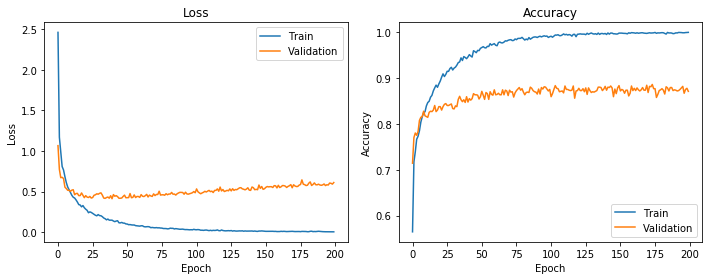

In [67]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

### Confusion Matrix

Confusion matrix, without normalization
[[250   4   7  39]
 [  5 257   4  34]
 [  4   3 283  10]
 [ 23  16   6 255]]


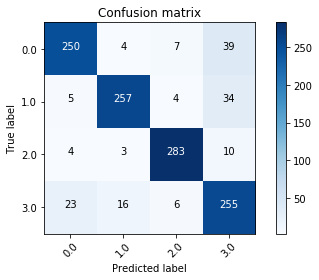

In [74]:
# Convert validation observations from one hot vectors to labels
Y_test_cnf = np.argmax(Y_test, axis=1)

#Plotting the confusion matrix
cnf_matrix = confusion_matrix(Y_test_cnf, Y_pred)
plot_confusion_matrix(cnf_matrix, classes=classes)

### We can further increase our accuracy by adding more layers